In [1]:
'''Bibliotecas usadas'''

import h5py
import numpy as np
import matplotlib.pyplot as plt 
import os
from scipy.fft import fft, fftfreq
from scipy import signal

In [2]:
#Ruta de los archivos que queremos buscar 
path = "E:\\Servicio\\MEA2\\20211005\\H5\\RAW\\CTR"
content_dir = os.listdir(path)
content_dir.sort()
print("Archivos a cocatenar: ")
files = [] #Se inicializa una lista vacía

for i in range(0, len(content_dir)):
    if '.h5' in content_dir[i]: #Solo para archivos .h5
        files.append(h5py.File(path+"\\"+content_dir[i]))
        file_stat = os.stat(path+"\\"+content_dir[i])
        print("{} name: {} {:.2f} MB".format(len(files), content_dir[i], file_stat.st_size / (1024 * 1024)))

Archivos a cocatenar: 
1 name: CTR20211005s02A_RAW.h5 1036.50 MB
2 name: CTR20211005s02B_RAW.h5 1043.88 MB
3 name: CTR20211005s02C_RAW.h5 1107.74 MB


In [3]:
# Estudio del segmento 35
segment_35 = []

for i in range(0, len(files)):
    segment_35.append(np.array(files[i]['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][119-35]))
    
np_segment_35 = np.concatenate(segment_35, axis = 0)

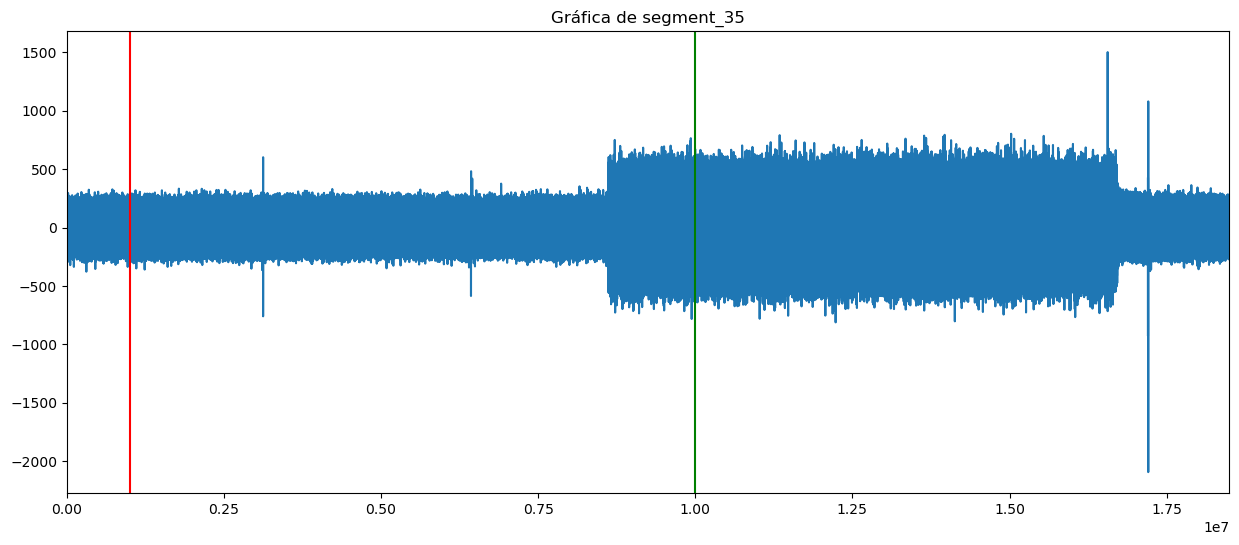

Tamaño del arreglo: 18498000


In [4]:
plt.figure(figsize=(15,6))
plt.plot(np_segment_35)

plt.axvline(x=1000000, ymin=-1000, ymax=1000, color = "red")
plt.axvline(x=10000000, ymin=-1000, ymax=1000, color = "green")

plt.xlim(0, len(np_segment_35))
plt.title("Gráfica de segment_35")
plt.show()
print("Tamaño del arreglo: {}".format(len(np_segment_35)))

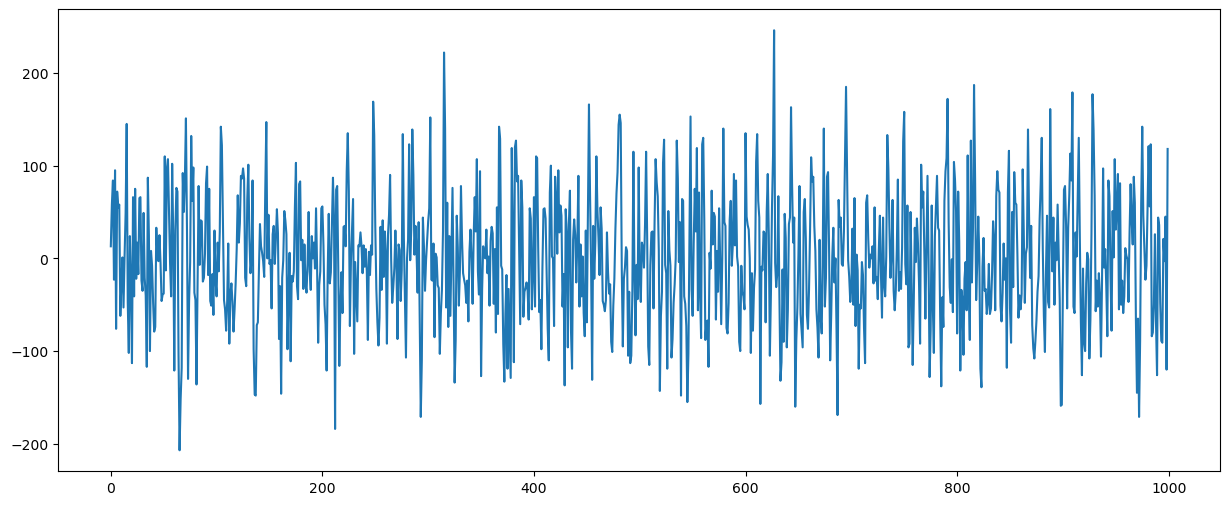

In [5]:
#Without noise
plt.figure(figsize=(15,6))
plt.plot(np_segment_35[1000000:1001000])

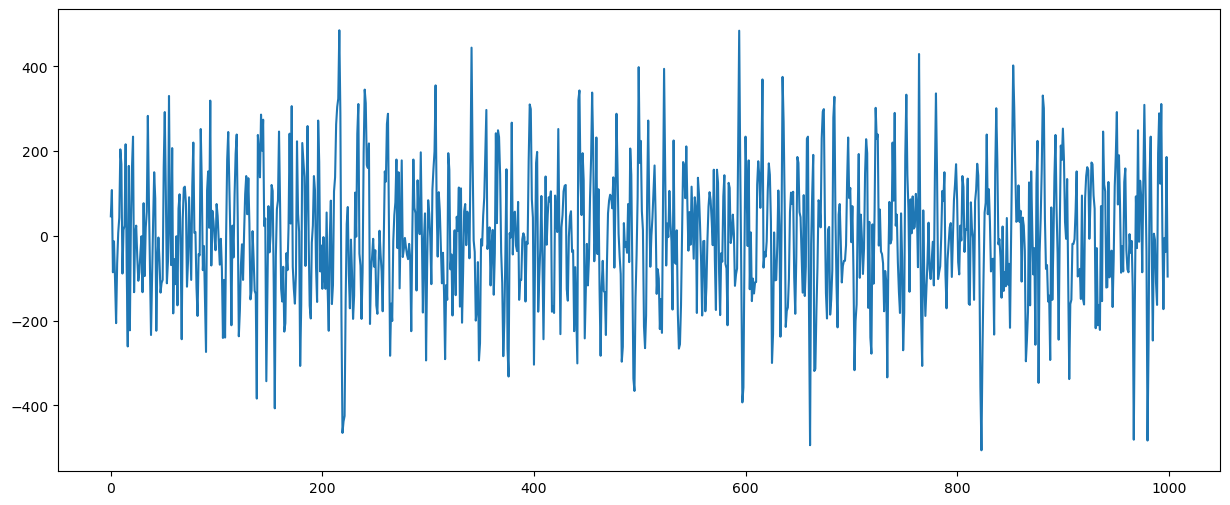

In [6]:
#With noise
plt.figure(figsize=(15,6))
plt.plot(np_segment_35[10000000:10001000])

# Transformada rápida de Fourier

Code example:

https://docs.scipy.org/doc/scipy/tutorial/fft.html

Fast Fourier Transforms:

https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft

https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

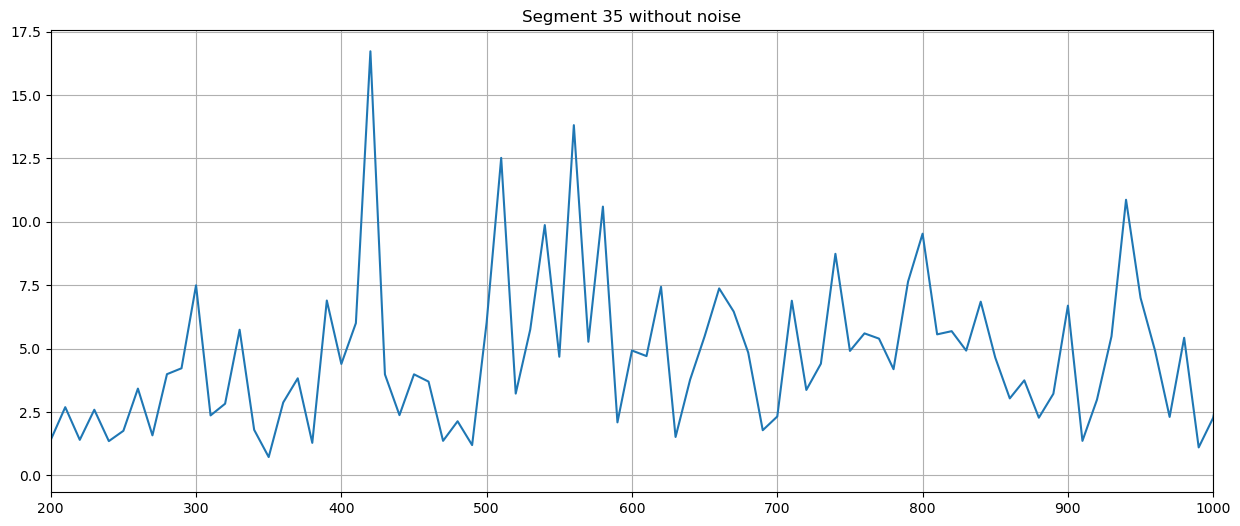

In [19]:
#from scipy.fft import fft, fftfreq

# number of sample points
N = 1000
#sampling spacing
T = 1.0 / 10000.0

#without noise
yf = fft(np_segment_35[1000000:1001000])
xf = fftfreq(N, T)[:N//2]
# Graphic
plt.figure(figsize=(15,6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(200, 1000)
plt.title("Segment 35 without noise")
plt.grid()
plt.show()


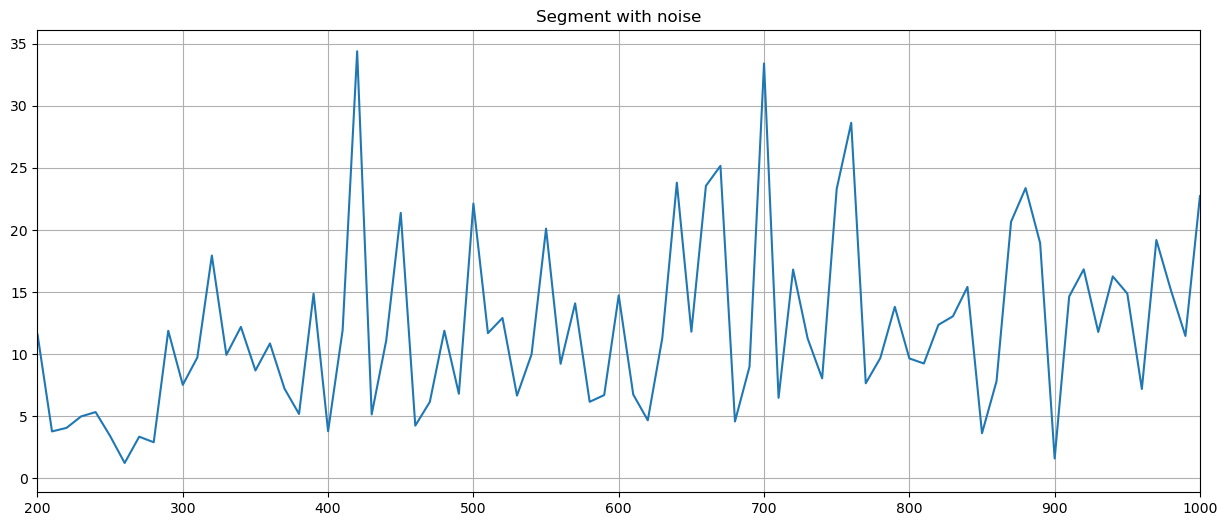

In [20]:
# number of sample points
N = 1000
#sampling spacing
T = 1.0 / 10000.0

#without noise
yf = fft(np_segment_35[10000000:10001000])
xf = fftfreq(N, T)[:N//2]
# Graphic
plt.figure(figsize=(15,6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(200, 1000)
plt.title("Segment with noise")
plt.grid()
plt.show()

# Filtrado

Banda de frecuencias sugerida para trabajar en los disparos de neuronas 200 a 500 Hz

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7452529/

Otra fuente dice que se debe usar un filtro pasabandas de 300 a 3000Hz 
https://arxiv.org/pdf/2109.08945.pdf
Esta incluye una propuesta para el filtrado

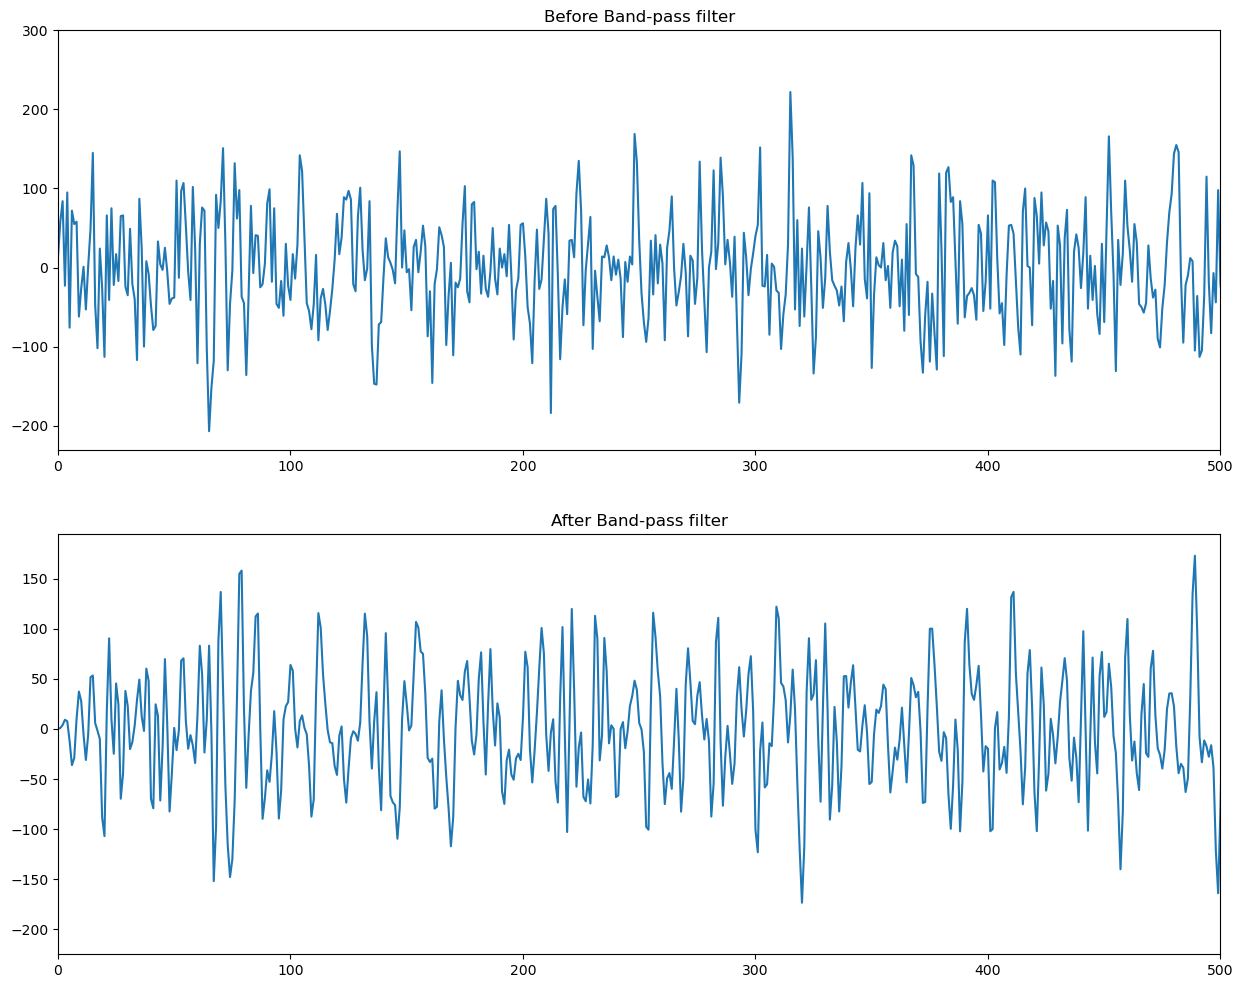

In [87]:
# Se propone un filtrado de 300 a 1000Hz
sos = signal.butter(10, [300,3000], 'bandpass', fs=10000, output='sos')


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,12))
#fig(figsize=(15,6))

section = np_segment_35[1000000:1002000]
lim_x = [0, 500]

#Without noise Raw
ax1.plot(section)
ax1.set_title('Before Band-pass filter')
ax1.set_xlim(lim_x)
#Without noise filtered
filtered = signal.sosfilt(sos, section)
ax2.plot(filtered)
ax2.set_title('After Band-pass filter')
ax2.set_xlim(lim_x)

plt.show()